# Pairgrid Example

This notebook shows how to perform the data transformation needing to construct a standard pairgrid plot using Altair. This example illustrates one of the core ideas of Altair and Vega-Lite: *subplot facetting is equivalent to a groupby operation*. 

## Imports

In [1]:
import numpy as np
import pandas as pd
from altair import *

## Load and transform data

In [2]:
iris = load_dataset('iris')
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


Here is a function that transforms the data so that the pairgrid can be constructed using groupby operations:

In [3]:
def pairgrid_transform(data, rows, cols=None):
    """
    Transform a dataframe to allow vega to produce a PairGrid
    
    """
    if cols is None:
        cols = rows
      
    M1 = len(rows)
    M2 = len(cols)
    N = len(data)
    
    data = pd.concat(M1 * M2 * [data])
    i = np.arange(N * M1 * M2)
    irow = np.arange(N * M1 * M2) // N % M1
    icol = np.arange(N * M1 * M2) // N // M1
    
    data['x'] = data[cols].values[i, icol]
    data['y'] = data[rows].values[i, irow]
    data['row'] = rows.values[irow]
    data['col'] = cols.values[icol]
    
    return data

Here is the transformed data. Notic how we now have `row` and `col` columns that contains the values we will groupby for the subplot facets:

In [4]:
data = pairgrid_transform(iris, iris.columns[:4])
data.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species,x,y,row,col
0,1.4,0.2,5.1,3.5,setosa,1.4,1.4,petalLength,petalLength
1,1.4,0.2,4.9,3.0,setosa,1.4,1.4,petalLength,petalLength
2,1.3,0.2,4.7,3.2,setosa,1.3,1.3,petalLength,petalLength
3,1.5,0.2,4.6,3.1,setosa,1.5,1.5,petalLength,petalLength
4,1.4,0.2,5.0,3.6,setosa,1.4,1.4,petalLength,petalLength


## Visualization

Now the pairgrid is a simple encoding of the transformed data:

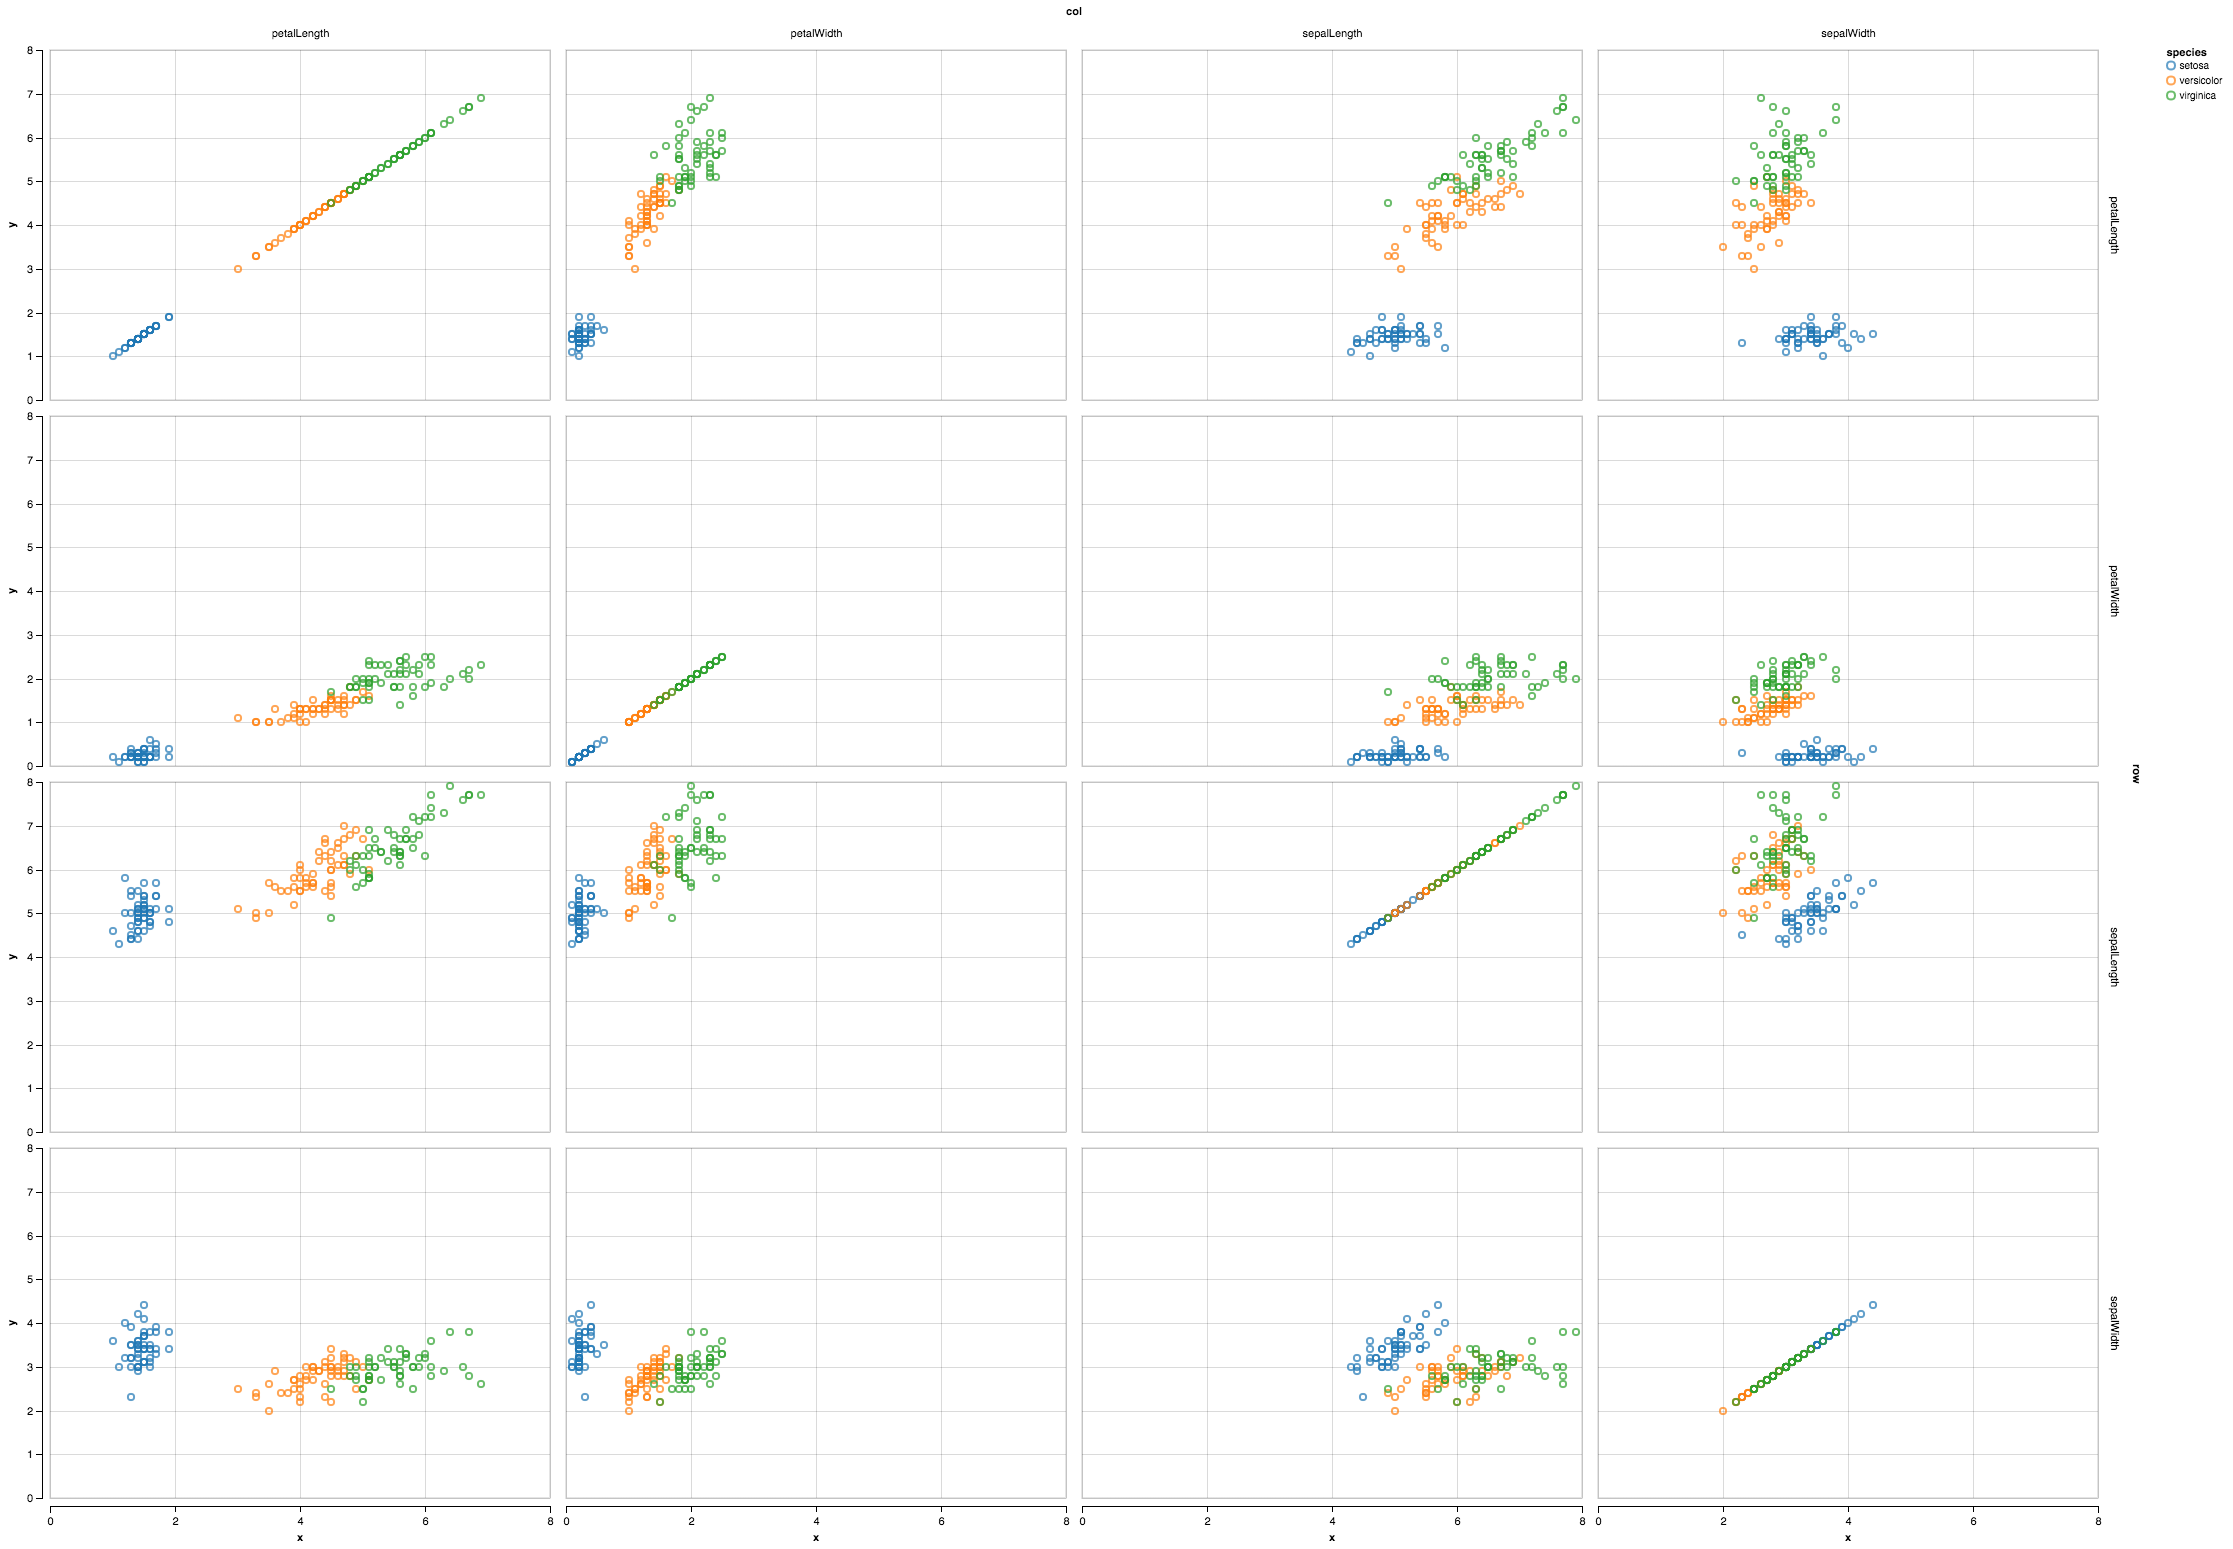

In [8]:
Layer(data).encode(
    X('x'),
    Y('y'),
    Row('row'),
    Column('col'),
    Color('species')
).point()